In [1]:
import pandas as pd

crashes_data = pd.read_csv('Crash_data.csv')
print(crashes_data.head())

    CASE_ID  ACCIDENT_YEAR   PROC_DATE  JURIS COLLISION_DATE  COLLISION_TIME  \
0   9456861           2022  2022-07-27    109     2022-02-16            2124   
1   9490962           2022  2022-09-01    109     2022-07-15            1550   
2   9512485           2022  2022-10-28    109     2022-04-19             901   
3   9586652           2022  2023-06-16    109     2022-10-13            1528   
4  91721633           2022  2022-03-14   9370     2022-03-06            2500   

  OFFICER_ID REPORTING_DISTRICT  DAY_OF_WEEK  CHP_SHIFT  ...  COUNT_MC_KILLED  \
0       9872                  2            3          5  ...                0   
1       9169                  1            5          5  ...                0   
2       9921                  1            2          5  ...                0   
3       9909                  1            4          5  ...                0   
4     021930                NaN            7          4  ...                0   

   COUNT_MC_INJURED  PRIMARY_RAM

In [2]:
crashes_data.columns

Index(['CASE_ID', 'ACCIDENT_YEAR', 'PROC_DATE', 'JURIS', 'COLLISION_DATE',
       'COLLISION_TIME', 'OFFICER_ID', 'REPORTING_DISTRICT', 'DAY_OF_WEEK',
       'CHP_SHIFT', 'POPULATION', 'CNTY_CITY_LOC', 'SPECIAL_COND', 'BEAT_TYPE',
       'CHP_BEAT_TYPE', 'CITY_DIVISION_LAPD', 'CHP_BEAT_CLASS', 'BEAT_NUMBER',
       'PRIMARY_RD', 'SECONDARY_RD', 'DISTANCE', 'DIRECTION', 'INTERSECTION',
       'WEATHER_1', 'WEATHER_2', 'STATE_HWY_IND', 'CALTRANS_COUNTY',
       'CALTRANS_DISTRICT', 'STATE_ROUTE', 'ROUTE_SUFFIX', 'POSTMILE_PREFIX',
       'POSTMILE', 'LOCATION_TYPE', 'RAMP_INTERSECTION', 'SIDE_OF_HWY',
       'TOW_AWAY', 'COLLISION_SEVERITY', 'NUMBER_KILLED', 'NUMBER_INJURED',
       'PARTY_COUNT', 'PRIMARY_COLL_FACTOR', 'PCF_CODE_OF_VIOL',
       'PCF_VIOL_CATEGORY', 'PCF_VIOLATION', 'PCF_VIOL_SUBSECTION',
       'HIT_AND_RUN', 'TYPE_OF_COLLISION', 'MVIW', 'PED_ACTION',
       'ROAD_SURFACE', 'ROAD_COND_1', 'ROAD_COND_2', 'LIGHTING',
       'CONTROL_DEVICE', 'CHP_ROAD_TYPE', 'PEDESTRIAN_

In [3]:
pip install osmnx

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install osmnet

Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install osmnet

Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - osmnet

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-arm64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-arm64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandana

Note: you may need to restart the kernel to use updated packages.


In [7]:
import geopandas

In [13]:
import geopandas as gpd

oakland_census_tracts = gpd.read_file("/Users/blairefrett/UCB_CYPLAN255_2024/assignments/New_folder_2/Oakland_Census.shp")

In [27]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

df = pd.read_csv('Crash_data.csv')

geometry = [Point(xy) for xy in zip(df['POINT_X'], df['POINT_Y'])]

gdf = gpd.GeoDataFrame(df, geometry=geometry)

gdf.crs = 'EPSG:4326'

print(gdf.head())

    CASE_ID  ACCIDENT_YEAR   PROC_DATE  JURIS COLLISION_DATE  COLLISION_TIME  \
0   9456861           2022  2022-07-27    109     2022-02-16            2124   
1   9490962           2022  2022-09-01    109     2022-07-15            1550   
2   9512485           2022  2022-10-28    109     2022-04-19             901   
3   9586652           2022  2023-06-16    109     2022-10-13            1528   
4  91721633           2022  2022-03-14   9370     2022-03-06            2500   

  OFFICER_ID REPORTING_DISTRICT  DAY_OF_WEEK  CHP_SHIFT  ...  \
0       9872                  2            3          5  ...   
1       9169                  1            5          5  ...   
2       9921                  1            2          5  ...   
3       9909                  1            4          5  ...   
4     021930                NaN            7          4  ...   

   COUNT_MC_INJURED  PRIMARY_RAMP  SECONDARY_RAMP  LATITUDE   LONGITUDE  \
0                 0            -               -        NaN

In [28]:
pedestrian_accidents_gdf = gdf[(gdf['PEDESTRIAN_ACCIDENT'] == 'Y') & 
                                gdf['POINT_X'].notnull() & 
                                gdf['POINT_Y'].notnull()]

pedestrian_accidents_points_gdf = pedestrian_accidents_gdf[['PEDESTRIAN_ACCIDENT', 'geometry']]

print(pedestrian_accidents_points_gdf.head())

   PEDESTRIAN_ACCIDENT                     geometry
2                    Y  POINT (-122.25845 37.80933)
25                   Y  POINT (-122.21614 37.80038)
30                   Y  POINT (-122.17464 37.74982)
31                   Y  POINT (-122.22167 37.77411)
40                   Y  POINT (-122.20524 37.76772)


In [29]:
oakland_census_tracts = oakland_census_tracts.to_crs(epsg=4326)

joined_gdf = gpd.sjoin(pedestrian_accidents_points_gdf, oakland_census_tracts, how="inner", op="intersects")

print(joined_gdf.head())

     PEDESTRIAN_ACCIDENT                     geometry  index_right  \
2                      Y  POINT (-122.25845 37.80933)           30   
417                    Y  POINT (-122.26286 37.80106)           30   
1808                   Y  POINT (-122.26274 37.80593)           30   
25                     Y  POINT (-122.21614 37.80038)           49   
1618                   Y  POINT (-122.21732 37.80067)           49   

            GEOID     ALAND    AWATER     INTPTLAT      INTPTLON  \
2     06001403401  549686.0  602434.0  +37.8092493  -122.2597833   
417   06001403401  549686.0  602434.0  +37.8092493  -122.2597833   
1808  06001403401  549686.0  602434.0  +37.8092493  -122.2597833   
25    06001404800  628405.0       0.0  +37.8055076  -122.2131962   
1618  06001404800  628405.0       0.0  +37.8055076  -122.2131962   

                      NAME       State  ... PCT120202  PCT120203  PCT120204  \
2     Census Tract 4034.01  California  ...         7         11          1   
417   Census

/Users/blairefrett/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [ ]:
#start with census tracts first, so that we preserve the geometry of the tracts, and join the accidents to it 
#might also have to play with predicate to be contains 

In [30]:
joined_gdf = gpd.sjoin(pedestrian_accidents_points_gdf, oakland_census_tracts, how="inner", predicate="intersects")

print(joined_gdf.head())


     PEDESTRIAN_ACCIDENT                     geometry  index_right  \
2                      Y  POINT (-122.25845 37.80933)           30   
417                    Y  POINT (-122.26286 37.80106)           30   
1808                   Y  POINT (-122.26274 37.80593)           30   
25                     Y  POINT (-122.21614 37.80038)           49   
1618                   Y  POINT (-122.21732 37.80067)           49   

            GEOID     ALAND    AWATER     INTPTLAT      INTPTLON  \
2     06001403401  549686.0  602434.0  +37.8092493  -122.2597833   
417   06001403401  549686.0  602434.0  +37.8092493  -122.2597833   
1808  06001403401  549686.0  602434.0  +37.8092493  -122.2597833   
25    06001404800  628405.0       0.0  +37.8055076  -122.2131962   
1618  06001404800  628405.0       0.0  +37.8055076  -122.2131962   

                      NAME       State  ... PCT120202  PCT120203  PCT120204  \
2     Census Tract 4034.01  California  ...         7         11          1   
417   Census

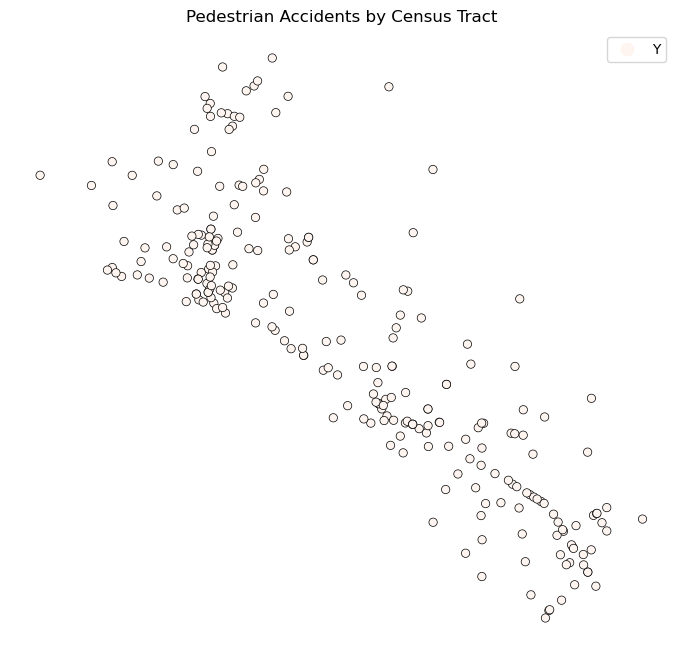

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
joined_gdf.plot(column='PEDESTRIAN_ACCIDENT', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='black', legend=True)
ax.set_title('Pedestrian Accidents by Census Tract')
plt.axis('off')
plt.show()

In [33]:
pedestrian_accidents_points_gdf['count']=1

/Users/blairefrett/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [34]:
joined_gdf = gpd.sjoin(oakland_census_tracts, pedestrian_accidents_points_gdf, how="inner", predicate="intersects")

print(joined_gdf.head())


         GEOID      ALAND  AWATER     INTPTLAT      INTPTLON  \
1  06001400200   586560.0     0.0  +37.8481378  -122.2495916   
1  06001400200   586560.0     0.0  +37.8481378  -122.2495916   
2  06001400300  1110840.0     0.0  +37.8405841  -122.2544782   
3  06001400400   716138.0     0.0  +37.8482840  -122.2574447   
3  06001400400   716138.0     0.0  +37.8482840  -122.2574447   

                NAME       State          County  P0010001  H0010001  ...  \
1  Census Tract 4002  California  Alameda County      2001       892  ...   
1  Census Tract 4002  California  Alameda County      2001       892  ...   
2  Census Tract 4003  California  Alameda County      5504      2764  ...   
3  Census Tract 4004  California  Alameda County      4112      1958  ...   
3  Census Tract 4004  California  Alameda County      4112      1958  ...   

   PCT120206  PCT120207  PCT120208  PCT120209   Shape_Leng    Shape_Area  \
1          0          0          0          0  5067.599007  9.418149e+05   


In [35]:
joined_gdf.groupby(['GEOID', 'geometry'])['count'].sum().reset_index() 

,GEOID,geometry,count
0,06001400200,"POLYGON ((-122.24373 37.84852, -122.24552 37.8...",2
1,06001400300,"POLYGON ((-122.25082 37.83714, -122.25085 37.8...",1
2,06001400400,"POLYGON ((-122.25334 37.85376, -122.25334 37.8...",2
3,06001400500,"POLYGON ((-122.26131 37.84503, -122.26140 37.8...",1
4,06001400600,"POLYGON ((-122.26131 37.84503, -122.26133 37.8...",1
...,...,...,...
74,06001409800,"POLYGON ((-122.15808 37.77335, -122.15771 37.7...",1
75,06001410300,"POLYGON ((-122.15952 37.74505, -122.15978 37.7...",3
76,06001410500,"POLYGON ((-122.28404 37.81563, -122.28406 37.8...",1
77,06001426100,"MULTIPOLYGON (((-122.21791 37.81286, -122.2178...",1


In [232]:
oakland_census_tracts = oakland_census_tracts.to_crs(epsg=4326)


/Users/blairefrett/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


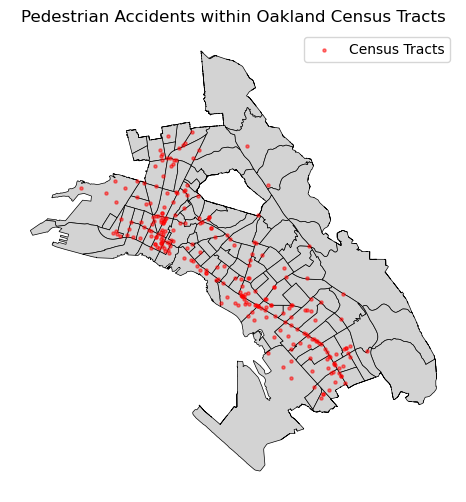

In [233]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Perform the spatial join
joined_gdf = gpd.sjoin(pedestrian_accidents_points_gdf, oakland_census_tracts, how="inner", op="intersects")

# Plot the Oakland census tracts map
fig, ax = plt.subplots(figsize=(10, 6))
oakland_census_tracts.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5)

# Plot the joined GeoDataFrame
joined_gdf.plot(ax=ax, color='red', markersize=5, alpha=0.5)

# Add title and legend
plt.title('Pedestrian Accidents within Oakland Census Tracts')
plt.legend(['Census Tracts', 'Pedestrian Accidents'])

# Remove axis
ax.set_axis_off()

# Show the plot
plt.show()


<Axes: >

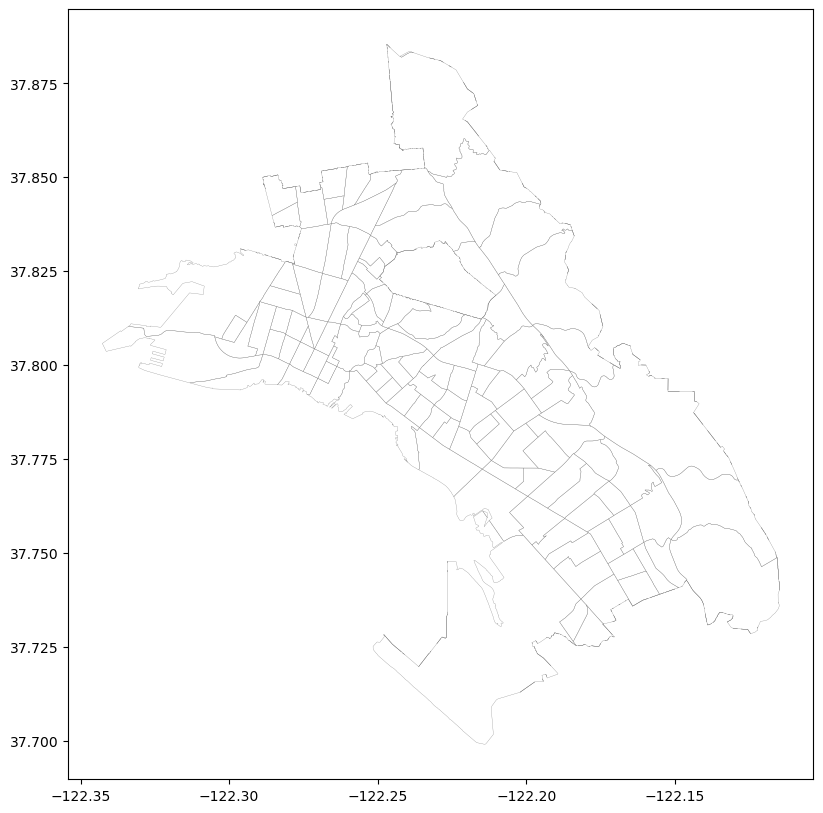

In [192]:
oakland_census_tracts.plot(color='none', edgecolor='gray', linewidth=.2, figsize=(14,10))

In [ ]:
#load csv- crashes

In [ ]:
#convert to shapefile- gdf

In [ ]:
#use notebook 15 code (berkeley+vandalism) for overlaying

In [193]:
import pandas as pd
crashes = pd.read_csv('Crash_data.csv')
print(crashes.head())

    CASE_ID  ACCIDENT_YEAR   PROC_DATE  JURIS COLLISION_DATE  COLLISION_TIME  \
0   9456861           2022  2022-07-27    109     2022-02-16            2124   
1   9490962           2022  2022-09-01    109     2022-07-15            1550   
2   9512485           2022  2022-10-28    109     2022-04-19             901   
3   9586652           2022  2023-06-16    109     2022-10-13            1528   
4  91721633           2022  2022-03-14   9370     2022-03-06            2500   

  OFFICER_ID REPORTING_DISTRICT  DAY_OF_WEEK  CHP_SHIFT  ...  COUNT_MC_KILLED  \
0       9872                  2            3          5  ...                0   
1       9169                  1            5          5  ...                0   
2       9921                  1            2          5  ...                0   
3       9909                  1            4          5  ...                0   
4     021930                NaN            7          4  ...                0   

   COUNT_MC_INJURED  PRIMARY_RAM

In [194]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

df = pd.read_csv('Crash_data.csv')

geometry = [Point(xy) for xy in zip(df['POINT_X'], df['POINT_Y'])]

gdf = gpd.GeoDataFrame(df, geometry=geometry)

gdf.crs = 'EPSG:4326'

print(gdf.head())

    CASE_ID  ACCIDENT_YEAR   PROC_DATE  JURIS COLLISION_DATE  COLLISION_TIME  \
0   9456861           2022  2022-07-27    109     2022-02-16            2124   
1   9490962           2022  2022-09-01    109     2022-07-15            1550   
2   9512485           2022  2022-10-28    109     2022-04-19             901   
3   9586652           2022  2023-06-16    109     2022-10-13            1528   
4  91721633           2022  2022-03-14   9370     2022-03-06            2500   

  OFFICER_ID REPORTING_DISTRICT  DAY_OF_WEEK  CHP_SHIFT  ...  \
0       9872                  2            3          5  ...   
1       9169                  1            5          5  ...   
2       9921                  1            2          5  ...   
3       9909                  1            4          5  ...   
4     021930                NaN            7          4  ...   

   COUNT_MC_INJURED  PRIMARY_RAMP  SECONDARY_RAMP  LATITUDE   LONGITUDE  \
0                 0            -               -        NaN

In [214]:
pedestrian_accidents_gdf = gdf[(gdf['PEDESTRIAN_ACCIDENT'] == 'Y') & 
                                gdf['POINT_X'].notnull() & 
                                gdf['POINT_Y'].notnull()]

pedestrian_accidents_points_gdf = pedestrian_accidents_gdf[['POINT_X', 'POINT_Y', 'geometry']]

print(pedestrian_accidents_points_gdf.head())

       POINT_X    POINT_Y                     geometry
2  -122.258453  37.809334  POINT (-122.25845 37.80933)
25 -122.216141  37.800377  POINT (-122.21614 37.80038)
30 -122.174637  37.749825  POINT (-122.17464 37.74982)
31 -122.221672  37.774109  POINT (-122.22167 37.77411)
40 -122.205238  37.767723  POINT (-122.20524 37.76772)


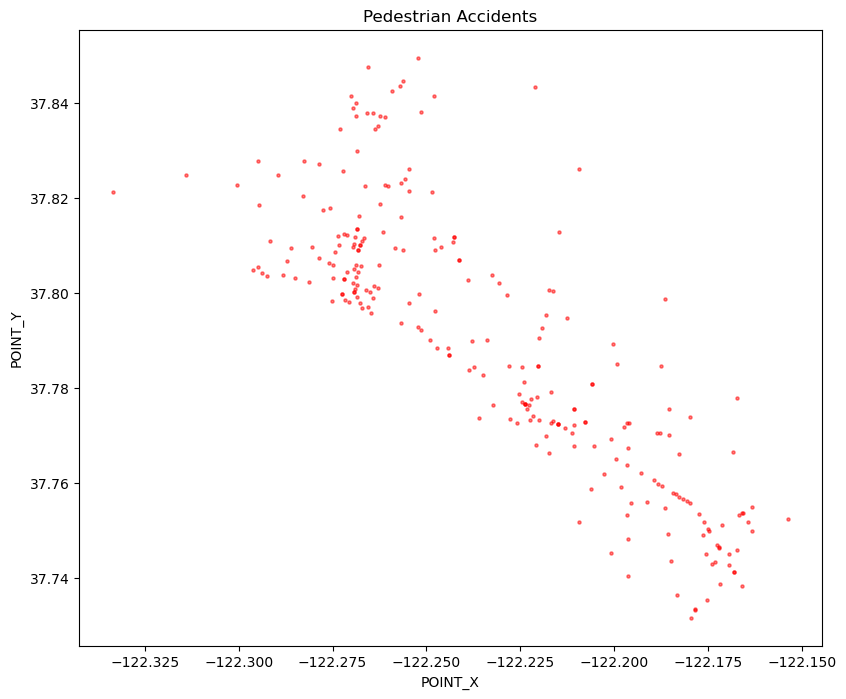

In [215]:
import matplotlib.pyplot as plt

ax = pedestrian_accidents_points_gdf.plot(markersize=5, color='red', alpha=0.5, figsize=(10, 8))

plt.title('Pedestrian Accidents')
plt.xlabel('POINT_X')
plt.ylabel('POINT_Y')

plt.show()

In [216]:
num_pedestrian_accidents = len(pedestrian_accidents_points_gdf)

print("Number of pedestrian accidents:", num_pedestrian_accidents)

Number of pedestrian accidents: 256


overlay_result.plot(color='black', edgecolor='black', linewidth=.2, figsize=(14,10))

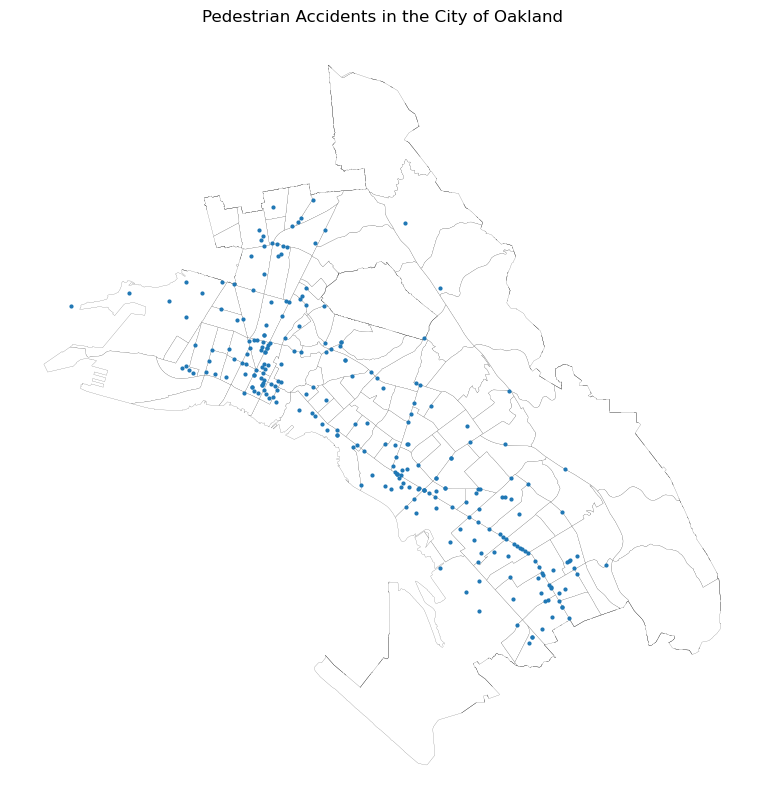

In [217]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(18,10))
oakland_census_tracts.plot(color='white', edgecolor='black', linewidth=.1, ax=ax)
pedestrian_accidents_points_gdf.plot(markersize=4, ax=ax)
ax.set_title('Pedestrian Accidents in the City of Oakland')
ax.set_axis_off()

In [218]:
# Display the attribute table of the GeoDataFrame
print(oakland_census_tracts.head())

         GEOID      ALAND  AWATER     INTPTLAT      INTPTLON  \
0  06001400100  6945857.0     0.0  +37.8676563  -122.2318813   
1  06001400200   586560.0     0.0  +37.8481378  -122.2495916   
2  06001400300  1110840.0     0.0  +37.8405841  -122.2544782   
3  06001400400   716138.0     0.0  +37.8482840  -122.2574447   
4  06001400500   591424.0     0.0  +37.8485452  -122.2647353   

                NAME       State          County  P0010001  H0010001  ...  \
0  Census Tract 4001  California  Alameda County      3038      1395  ...   
1  Census Tract 4002  California  Alameda County      2001       892  ...   
2  Census Tract 4003  California  Alameda County      5504      2764  ...   
3  Census Tract 4004  California  Alameda County      4112      1958  ...   
4  Census Tract 4005  California  Alameda County      3644      1694  ...   

   PCT120203  PCT120204  PCT120205  PCT120206  PCT120207  PCT120208  \
0          0          2          1          0          0          0   
1         

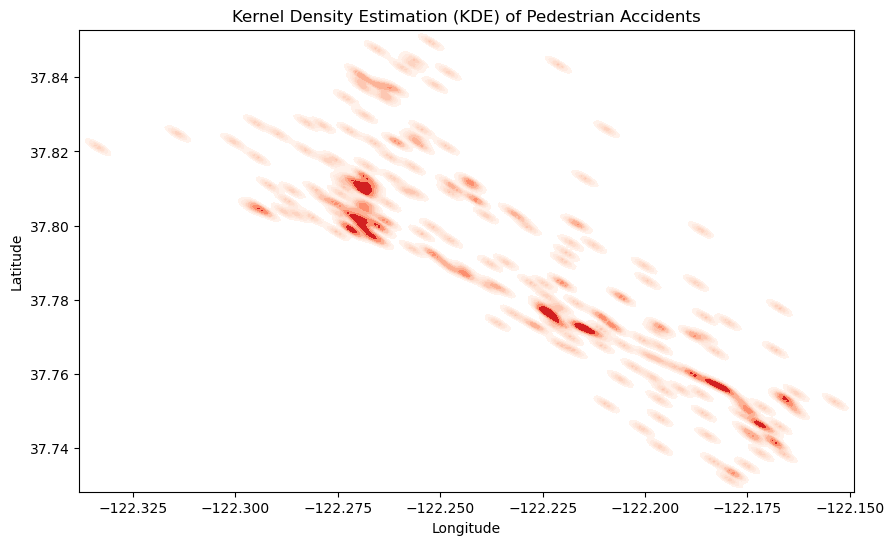

In [219]:
import seaborn as sns

# Extract X and Y coordinates from pedestrian accidents GeoDataFrame
x_coords = pedestrian_accidents_points_gdf.geometry.x
y_coords = pedestrian_accidents_points_gdf.geometry.y

# Plot kernel density estimation (KDE) plot for pedestrian accidents
plt.figure(figsize=(10, 6))
sns.kdeplot(x=x_coords, 
            y=y_coords, 
            cmap='Reds', 
            fill=True,  # Use fill instead of shade
            bw_adjust=0.1)
plt.title('Kernel Density Estimation (KDE) of Pedestrian Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Figure size 1800x1200 with 0 Axes>

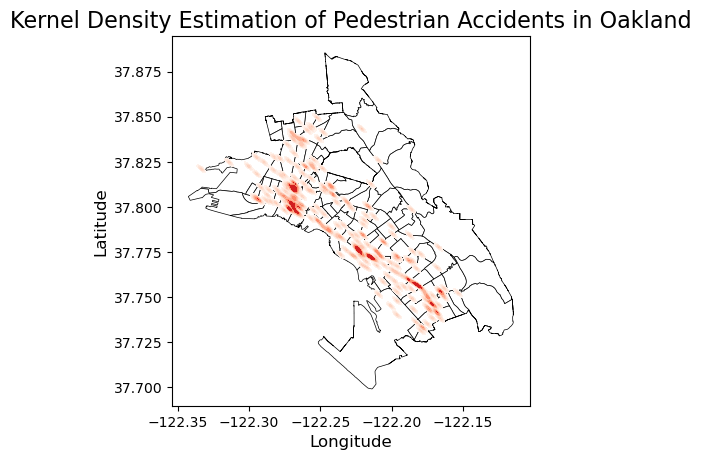

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and DPI for higher resolution
plt.figure(figsize=(12, 8), dpi=150)

# Plot the Oakland census tract map
oakland_census_tracts.plot(color='white', edgecolor='black', linewidth=0.5)

# Extract X and Y coordinates from pedestrian accidents GeoDataFrame
x_coords = pedestrian_accidents_points_gdf.geometry.x
y_coords = pedestrian_accidents_points_gdf.geometry.y

# Plot kernel density estimation (KDE) plot for pedestrian accidents
sns.kdeplot(x=x_coords, 
            y=y_coords, 
            cmap='Reds', 
            fill=True,  # Use fill instead of shade
            bw_adjust=0.1)

# Add title and labels with larger font sizes
plt.title('Kernel Density Estimation of Pedestrian Accidents in Oakland', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Remove grid lines
plt.grid(False)

# Show the plot
plt.show()


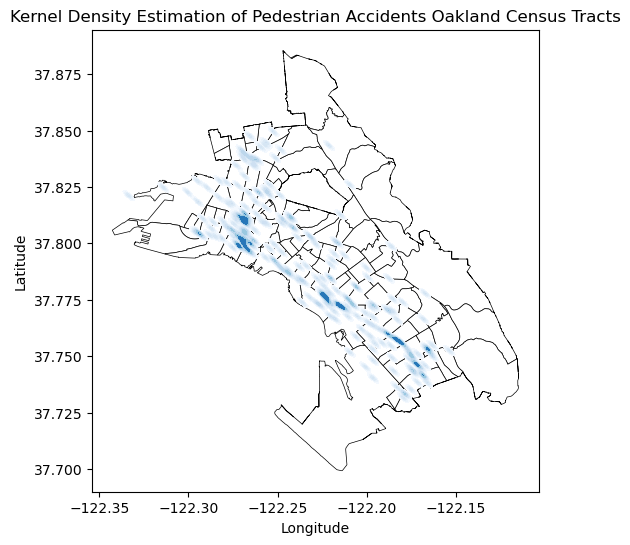

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the Oakland census tract map
fig, ax = plt.subplots(figsize=(10, 6))
oakland_census_tracts.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)

# Extract X and Y coordinates from pedestrian accidents GeoDataFrame
x_coords = pedestrian_accidents_points_gdf.geometry.x
y_coords = pedestrian_accidents_points_gdf.geometry.y

# Plot kernel density estimation (KDE) plot for pedestrian accidents
sns.kdeplot(x=x_coords, 
            y=y_coords, 
            cmap='Blues', 
            fill=True,  # Use fill instead of shade
            bw_adjust=0.1,
            ax=ax)
plt.title('Kernel Density Estimation of Pedestrian Accidents Oakland Census Tracts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [125]:
tract_v = oakland_census_tracts.groupby('tractce10')['case_id'].count().to_frame(name='pedestrian_accidents').reset_index()
tract_v.head()

KeyError: 'tractce10'

In [ ]:
# oakland_census_tracts.plot(column='total_vandalism', figsize=(14,10), legend=True)

# Bicylce Data

In [223]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Read the CSV file into a DataFrame
df = pd.read_csv('Crash_data.csv')

# Assuming 'latitude' and 'longitude' are the column names for geographic coordinates
# Create Point geometries from latitude and longitude
geometry = [Point(xy) for xy in zip(df['POINT_X'], df['POINT_Y'])]

# Create a GeoDataFrame with the DataFrame and geometry
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Set the coordinate reference system (CRS) if applicable
# For example, if your data is in WGS84 (EPSG:4326), you can set it like this:
gdf.crs = 'EPSG:4326'

# Now you have a GeoDataFrame containing your data with geometry information
print(gdf.head())

    CASE_ID  ACCIDENT_YEAR   PROC_DATE  JURIS COLLISION_DATE  COLLISION_TIME  \
0   9456861           2022  2022-07-27    109     2022-02-16            2124   
1   9490962           2022  2022-09-01    109     2022-07-15            1550   
2   9512485           2022  2022-10-28    109     2022-04-19             901   
3   9586652           2022  2023-06-16    109     2022-10-13            1528   
4  91721633           2022  2022-03-14   9370     2022-03-06            2500   

  OFFICER_ID REPORTING_DISTRICT  DAY_OF_WEEK  CHP_SHIFT  ...  \
0       9872                  2            3          5  ...   
1       9169                  1            5          5  ...   
2       9921                  1            2          5  ...   
3       9909                  1            4          5  ...   
4     021930                NaN            7          4  ...   

   COUNT_MC_INJURED  PRIMARY_RAMP  SECONDARY_RAMP  LATITUDE   LONGITUDE  \
0                 0            -               -        NaN

In [224]:
# Filter the GeoDataFrame to include only bicycle accidents with non-null latitude and longitude
bicycle_accidents_gdf = gdf[(gdf['BICYCLE_ACCIDENT'] == 'Y') & 
                                gdf['POINT_X'].notnull() & 
                                gdf['POINT_Y'].notnull()]

# Create a new GeoDataFrame with only the required columns (e.g., longitude, latitude, and geometry)
bicycle_accidents_points_gdf = bicycle_accidents_gdf[['POINT_X', 'POINT_Y', 'geometry']]

# Now you have a GeoDataFrame containing only the longitude, latitude, and geometry points for pedestrian accidents
print(bicycle_accidents_points_gdf.head())

       POINT_X    POINT_Y                     geometry
3  -122.251213  37.827343  POINT (-122.25121 37.82734)
24 -122.260353  37.821709  POINT (-122.26035 37.82171)
37 -122.247223  37.788273  POINT (-122.24722 37.78827)
51 -122.255013  37.830212  POINT (-122.25501 37.83021)
59 -122.271233  37.804333  POINT (-122.27123 37.80433)


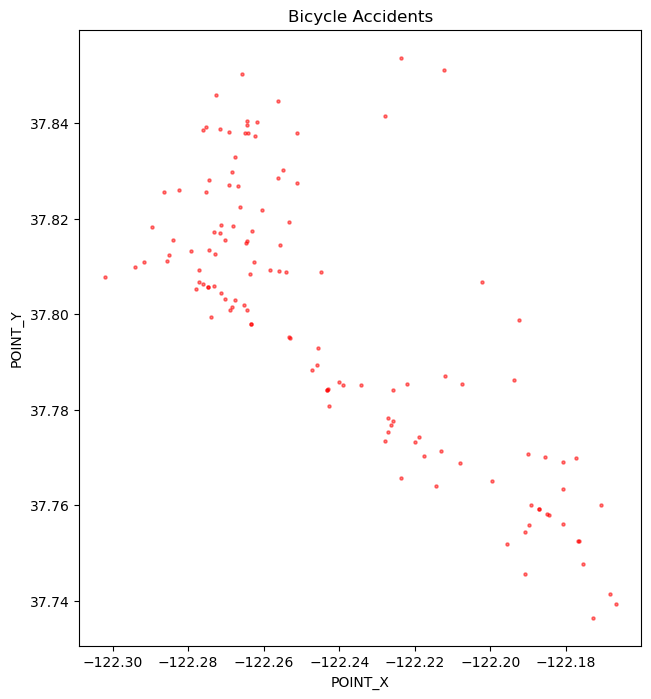

In [225]:
import matplotlib.pyplot as plt

# Plot the bicycle accidents
ax = bicycle_accidents_points_gdf.plot(markersize=5, color='red', alpha=0.5, figsize=(10, 8))

# Add title and labels
plt.title('Bicycle Accidents')
plt.xlabel('POINT_X')
plt.ylabel('POINT_Y')

# Display the plot
plt.show()

In [226]:
# Count the number of bicycle accident points
num_bicycle_accidents = len(bicycle_accidents_points_gdf)

# Print the number of pedestrian accident points
print("Number of bicycle accidents:", num_bicycle_accidents)

Number of bicycle accidents: 127


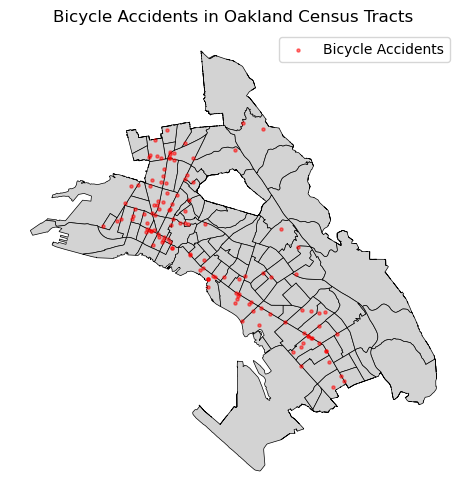

In [227]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plot the Oakland census tract map
fig, ax = plt.subplots(figsize=(10, 6))
oakland_census_tracts.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5)

# Plot the bicycle accident points
bicycle_accidents_points_gdf.plot(ax=ax, color='red', markersize=5, alpha=0.5)

# Add title and legend
plt.title('Bicycle Accidents in Oakland Census Tracts')
plt.legend(['Bicycle Accidents'])

# Remove axis
ax.set_axis_off()

# Show the plot
plt.show()


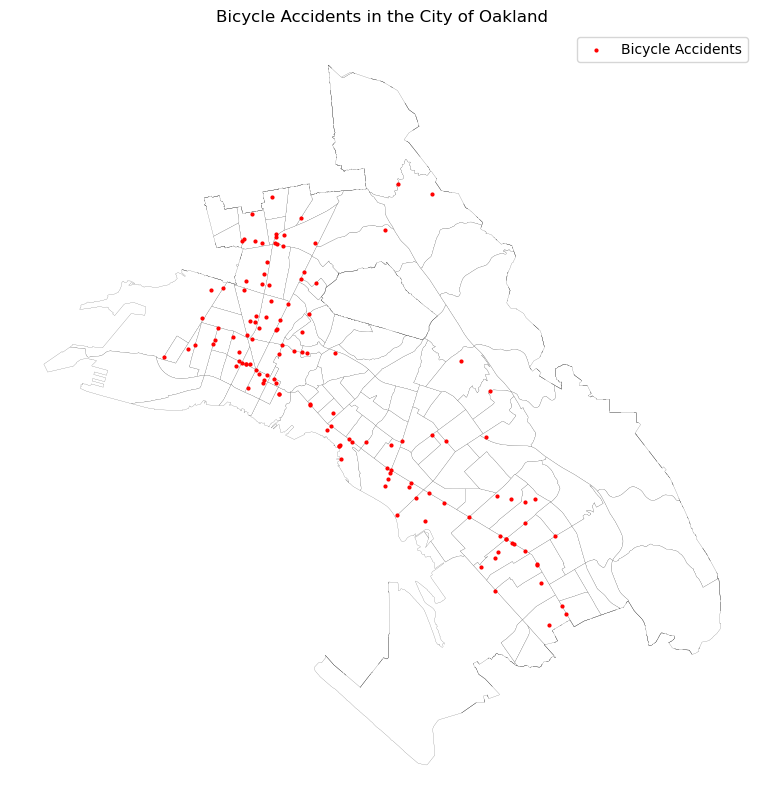

In [207]:
from matplotlib import pyplot as plt
import geopandas as gpd

# Assuming you have already loaded the census tracts and bicycle accident data

# Create a subplot
fig, ax = plt.subplots(figsize=(18, 10))

# Plot the census tracts
oakland_census_tracts.plot(color='white', edgecolor='black', linewidth=0.1, ax=ax)

# Plot the bicycle accidents
bicycle_accidents_points_gdf.plot(markersize=4, ax=ax, color='red', label='Bicycle Accidents')

# Set title and turn off axis
ax.set_title('Bicycle Accidents in the City of Oakland')
ax.set_axis_off()

# Show legend
ax.legend()

# Show the plot
plt.show()


ValueError: 'blues' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

<Figure size 1800x1200 with 0 Axes>

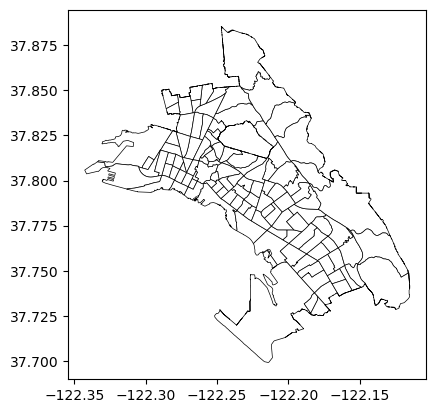

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and DPI for higher resolution
plt.figure(figsize=(12, 8), dpi=150)

# Plot the Oakland census tract map
oakland_census_tracts.plot(color='white', edgecolor='black', linewidth=0.5)

# Extract X and Y coordinates from bicycle accidents GeoDataFrame
x_coords = bicycle_accidents_points_gdf.geometry.x
y_coords = bicycle_accidents_points_gdf.geometry.y

# Plot kernel density estimation (KDE) plot for bicycle accidents
sns.kdeplot(x=x_coords, 
            y=y_coords, 
            cmap='blues', 
            fill=True,  # Use fill instead of shade
            bw_adjust=0.1)

# Add title and labels with larger font sizes
plt.title('Kernel Density Estimation of Bicycle Accidents in Oakland', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Remove grid lines
plt.grid(False)

# Show the plot
plt.show()


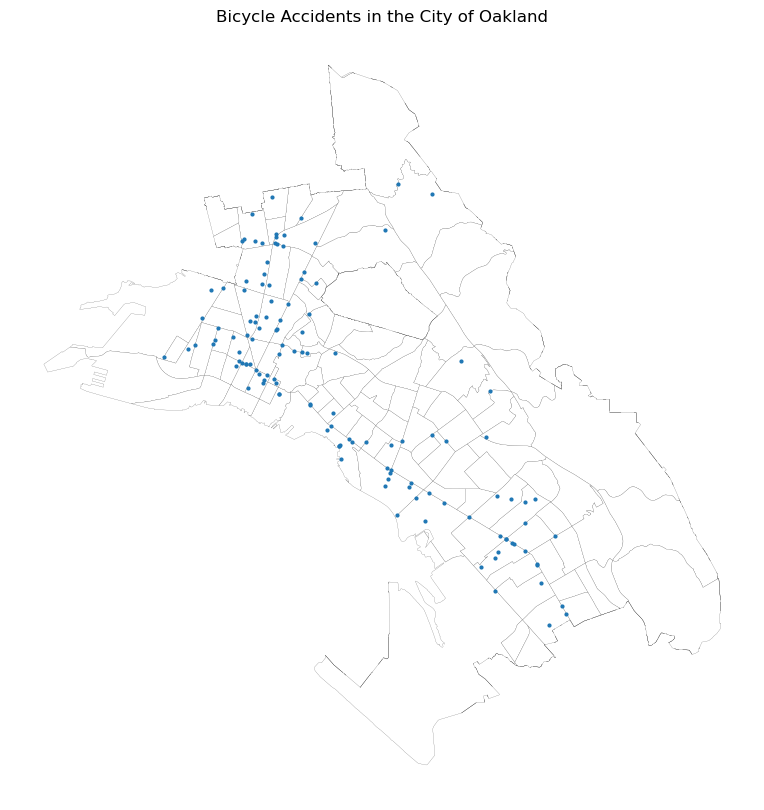

In [206]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(18,10))
oakland_census_tracts.plot(color='white', edgecolor='black', linewidth=.1, ax=ax)
bicycle_accidents_points_gdf.plot(markersize=4, ax=ax)
ax.set_title('Bicycle Accidents in the City of Oakland')
ax.set_axis_off()

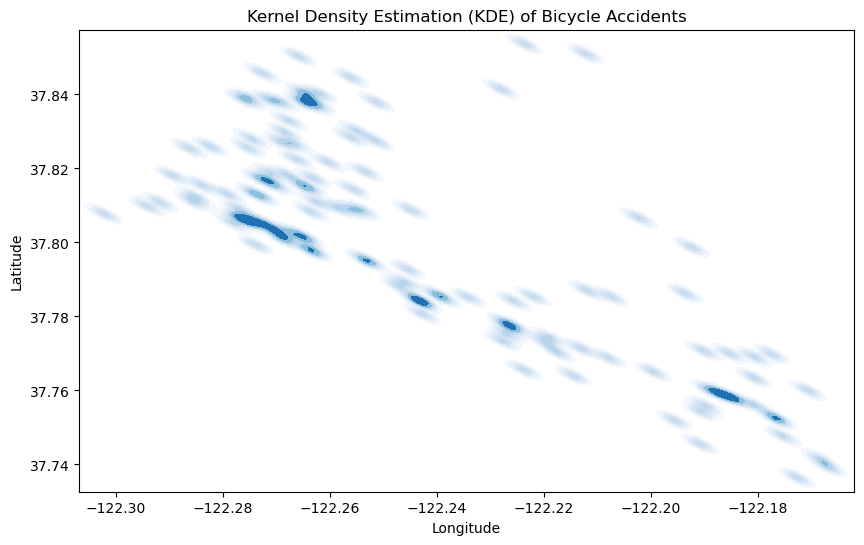

In [210]:
import seaborn as sns

# Extract X and Y coordinates from bicycle accidents GeoDataFrame
x_coords = bicycle_accidents_points_gdf.geometry.x
y_coords = bicycle_accidents_points_gdf.geometry.y

# Plot kernel density estimation (KDE) plot for bicycle accidents
plt.figure(figsize=(10, 6))
sns.kdeplot(x=x_coords, 
            y=y_coords, 
            cmap='Blues',  # Change colormap to blue for bicycle accidents
            fill=True,     # Use fill instead of shade
            bw_adjust=0.1)
plt.title('Kernel Density Estimation (KDE) of Bicycle Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


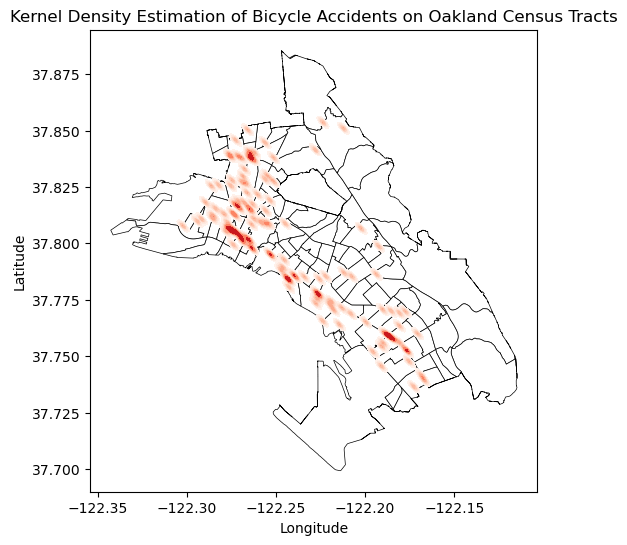

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the Oakland census tract map
fig, ax = plt.subplots(figsize=(10, 6))
oakland_census_tracts.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)

# Extract X and Y coordinates from bicycle accidents GeoDataFrame
x_coords = bicycle_accidents_points_gdf.geometry.x
y_coords = bicycle_accidents_points_gdf.geometry.y

# Plot kernel density estimation (KDE) plot for bicycle accidents
sns.kdeplot(x=x_coords, 
            y=y_coords, 
            cmap='Reds',  # Change colormap to blue for bicycle accidents
            fill=True,     # Use fill instead of shade
            bw_adjust=0.1,
            ax=ax)
plt.title('Kernel Density Estimation of Bicycle Accidents on Oakland Census Tracts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


#Graphing

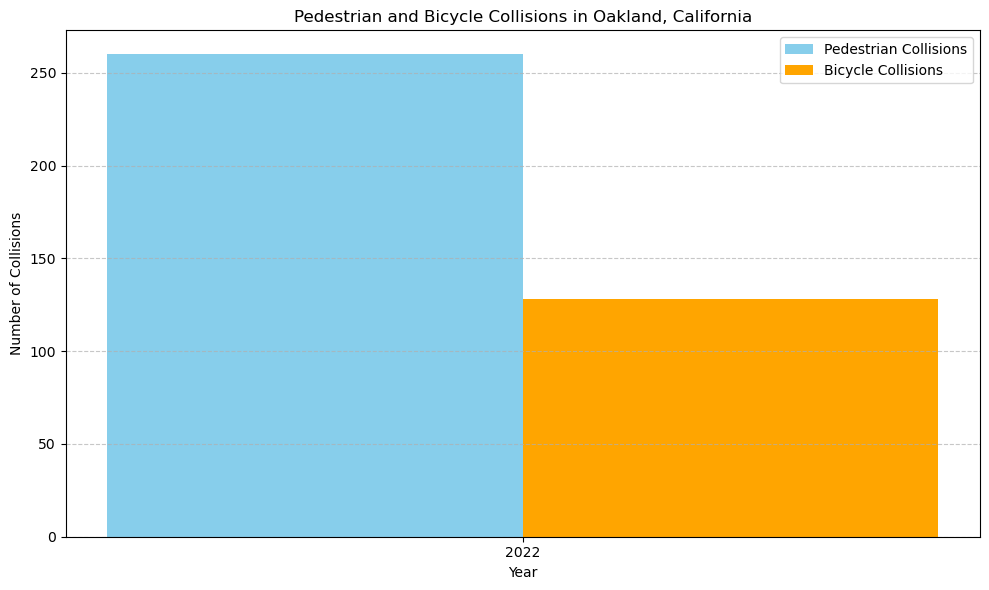

In [183]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the crash data into a DataFrame
crashes_data = pd.read_csv('Crash_data.csv')

# Filter the DataFrame to include only pedestrian and vehicle collisions in Oakland, California
oakland_crashes = crashes_data[((crashes_data['PEDESTRIAN_ACCIDENT'] == 'Y') | 
                                (crashes_data['BICYCLE_ACCIDENT'] == 'Y')) & 
                               (crashes_data['CITY'] == 'OAKLAND') & 
                               (crashes_data['COUNTY'] == 'ALAMEDA')]

# Create separate DataFrames for pedestrian and vehicle collisions
pedestrian_collisions = oakland_crashes[oakland_crashes['PEDESTRIAN_ACCIDENT'] == 'Y']
vehicle_collisions = oakland_crashes[oakland_crashes['BICYCLE_ACCIDENT'] == 'Y']

# Group by year and count the number of collisions for each type
pedestrian_collisions_by_year = pedestrian_collisions.groupby('ACCIDENT_YEAR').size()
vehicle_collisions_by_year = vehicle_collisions.groupby('ACCIDENT_YEAR').size()

# Plot the data
plt.figure(figsize=(10, 6))

# Plot pedestrian collisions
plt.bar(pedestrian_collisions_by_year.index - 0.2, pedestrian_collisions_by_year.values, 
        width=0.4, color='skyblue', label='Pedestrian Collisions')

# Plot vehicle collisions
plt.bar(vehicle_collisions_by_year.index + 0.2, vehicle_collisions_by_year.values, 
        width=0.4, color='orange', label='Bicycle Collisions')

plt.title('Pedestrian and Bicycle Collisions in Oakland, California')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.xticks(pedestrian_collisions_by_year.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

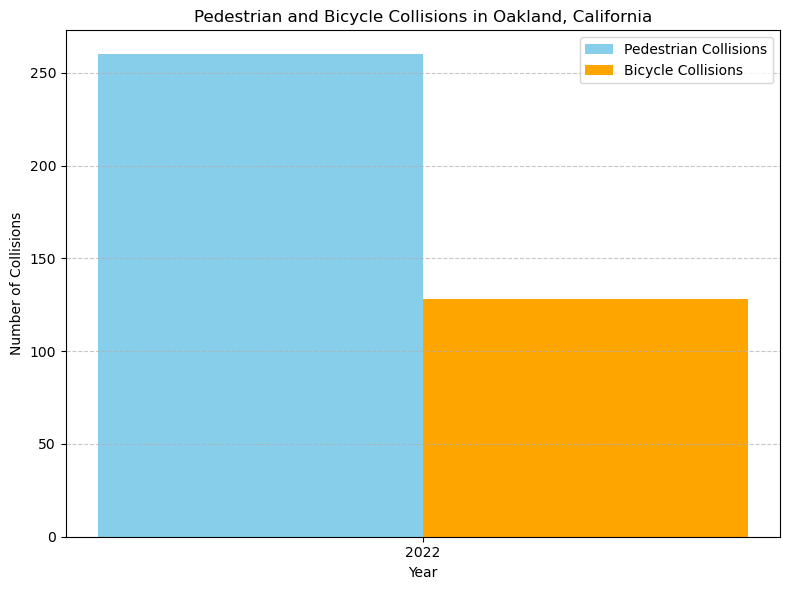

In [184]:
import matplotlib.pyplot as plt

# Load the crash data into a DataFrame
crashes_data = pd.read_csv('Crash_data.csv')

# Filter the DataFrame to include only pedestrian and vehicle collisions in Oakland, California
oakland_crashes = crashes_data[((crashes_data['PEDESTRIAN_ACCIDENT'] == 'Y') | 
                                (crashes_data['BICYCLE_ACCIDENT'] == 'Y')) & 
                               (crashes_data['CITY'] == 'OAKLAND') & 
                               (crashes_data['COUNTY'] == 'ALAMEDA')]

# Create separate DataFrames for pedestrian and vehicle collisions
pedestrian_collisions = oakland_crashes[oakland_crashes['PEDESTRIAN_ACCIDENT'] == 'Y']
vehicle_collisions = oakland_crashes[oakland_crashes['BICYCLE_ACCIDENT'] == 'Y']

# Group by year and count the number of collisions for each type
pedestrian_collisions_by_year = pedestrian_collisions.groupby('ACCIDENT_YEAR').size()
vehicle_collisions_by_year = vehicle_collisions.groupby('ACCIDENT_YEAR').size()

# Plot the data
plt.figure(figsize=(8, 6))  # Adjust the figure size here

# Plot pedestrian collisions
plt.bar(pedestrian_collisions_by_year.index - 0.2, pedestrian_collisions_by_year.values, 
        width=0.4, color='skyblue', label='Pedestrian Collisions')

# Plot vehicle collisions
plt.bar(vehicle_collisions_by_year.index + 0.2, vehicle_collisions_by_year.values, 
        width=0.4, color='orange', label='Bicycle Collisions')

plt.title('Pedestrian and Bicycle Collisions in Oakland, California')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.xticks(pedestrian_collisions_by_year.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [154]:
import geopandas as gpd

# Replace "path_to_shapefile" with the path to your shapefile
tracts = gpd.read_file("/Users/blairefrett/UCB_CYPLAN255_2024/assignments/Tracts_Oak/Tracts_Ped_Bike.shp")

In [155]:
print(tracts)

     Join_Count  TARGET_FID  CASE_ID  ACCIDENT_Y  JURIS  OFFICER_ID  \
0             1           3  9512485        2022    109        9921   
1             1           4  9586652        2022    109        9909   
2             1          25  9586538        2022    109        9401   
3             1          26  9617790        2022    109        9973   
4             1          31  9482720        2022    109        9511   
..          ...         ...      ...         ...    ...         ...   
381           1        2154  9595589        2022    109        9811   
382           1        2157  9614811        2022    109        9533   
383           1        2158  9615025        2022    109        9943   
384           1        2161  9617586        2022    109        9516   
385           1        2170  9640154        2022    109        8483   

     REPORTING_  DAY_OF_WEE  CHP_SHIFT  POPULATION  ...  PCT120201  PCT120202  \
0             1           2          5           7  ...         14

In [156]:
if "PEDESTRIAN_ACCIDENT" in tracts.columns:
    print("Column 'Pedestrian Accidents' exists.")
else:
    print("Column 'Pedestrian Accidents' does not exist.")

Column 'Pedestrian Accidents' does not exist.


In [147]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile into a GeoDataFrame
tracts = gpd.read_file("/Users/blairefrett/UCB_CYPLAN255_2024/assignments/Oak_Ped_Bike.shp")

# Filter the GeoDataFrame to include only polygons where PEDESTRIAN_ACCIDENTS is 'Y'
filtered_tracts = tracts.loc[tracts['PEDESTRIAN_ACCIDENT'] == 'Y']

# Plot the choropleth map
filtered_tracts.plot(column='PEDESTRIAN_ACCIDENT',  # specify the column containing the data
                     cmap='viridis',  # specify the colormap
                     legend=True,     # show legend
                     legend_kwds={'label': "Pedestrian Accidents"},  # specify legend label
                     figsize=(10, 6))  # specify figure size

# Add title
plt.title('Choropleth Map of Census Tracts with Pedestrian Accidents')

# Remove axes
plt.axis('off')

# Show the plot
plt.show()


KeyError: 'PEDESTRIAN_ACCIDENT'